# **7. Training Neural Networks | Deep Learning**
---

## 7.1 Activation Functions

Activation functions are critical components in neural networks, enabling them to learn complex patterns. They introduce non-linearity into the network, allowing the model to approximate any function and make more sophisticated decisions. Here's an overview of the most commonly used activation functions in neural networks:

### 1. **What is an Activation Function?**
   - An **activation function** is a mathematical function that takes an input and produces an output based on the input. It determines whether a neuron should be activated or not by applying a transformation.
   - Without activation functions, neural networks would essentially be just linear transformations, limiting their ability to learn complex patterns.

### 2. **Types of Activation Functions**
   
#### 2.1 **Sigmoid**
   - **Formula:** 
     ```plaintext
     f(x) = 1 / (1 + e^(-x))
     ```
![](https://machinelearningmastery.com/wp-content/uploads/2021/08/sigmoidUnit-768x307.png)

![](https://machinelearningmastery.com/wp-content/uploads/2021/08/sigmoid-768x430.png)

   - **Range:** (0, 1)
   - **Usage:** Commonly used in binary classification problems as it maps any input to a value between 0 and 1, making it suitable for probability estimation.
   - **Advantages:** Simple, interpretable output (probability).
   - **Disadvantages:**

      1. **Vanishing Gradient Problem**
         - **Issue:** Sigmoid saturates for large positive or negative inputs, causing the gradient to become very small.
         - **Impact:** Slows down training due to small gradients, especially in deep networks.
![](https://machinelearningmastery.com/wp-content/uploads/2021/08/sigmoid-768x430.png)
      2. **Output Not Zero-Centered**
         - **Issue:** Sigmoid outputs always fall between 0 and 1, making gradients biased and causing slow convergence.
         - **Impact:** Can lead to inefficient weight updates.
         - For sigmoid activation functions, **zero-mean input** is beneficial because it:
            1. **Improves Gradient Flow**: Ensures the gradients are larger and more effective during backpropagation, allowing for better weight updates.
            2. **Avoids Saturation**: Keeps the inputs in the active region of the sigmoid curve, preventing the gradients from becoming too small and causing slow learning.
            3. **Speeds Up Convergence**: Helps the network converge faster by avoiding regions of the sigmoid where the gradient is near zero.
            4. **Balances Output Distribution**: Keeps the activations centered around the middle of the sigmoid function, preventing neurons from becoming too active or inactive.

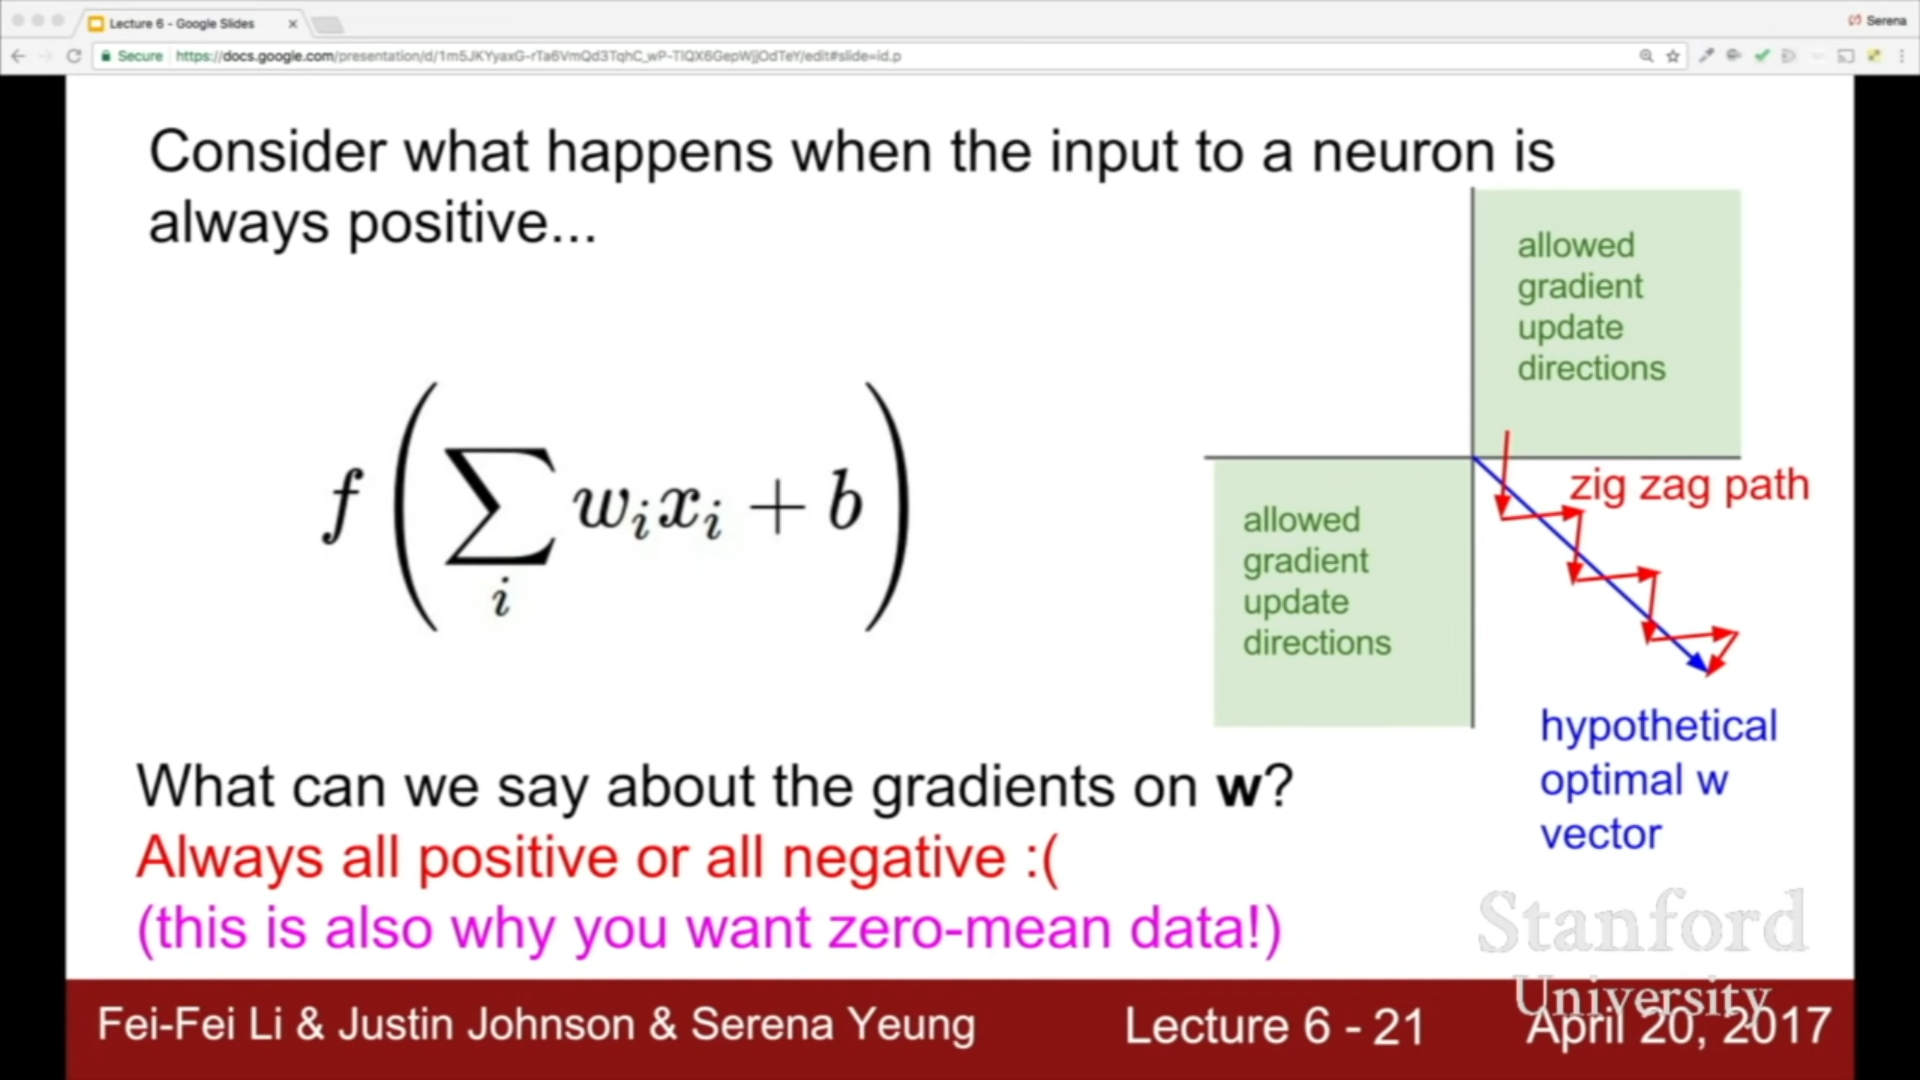
      3. **Computationally Expensive**
         - **Issue:** Sigmoid requires calculating an exponential function (\(e^{-x}\)), which is slower than simpler operations like ReLU.
         - **Impact:** Increases computational cost, especially in large networks.

   - **Alternatives:** 
      - **ReLU**: Solves vanishing gradient and computational cost issues.
      - **Tanh**: Zero-centered alternative to Sigmoid.   

#### 2.2 **Hyperbolic Tangent (tanh)**
   - **Formula:**
     ```plaintext
     f(x) = (e^x - e^(-x)) / (e^x + e^(-x))
     ```

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*f9erByySVjTjohfFdNkJYQ.jpeg)

   - **Range:** (-1, 1)
   - **Usage:** Often used in hidden layers as it centers the output around zero, helping reduce bias in the network.
   - **Advantages:** Unlike sigmoid, it has a wider output range, making it more effective in hidden layers.
   - **Disadvantages:** Still suffers from the vanishing gradient problem for extreme values of input.

      - **Range**: The tanh function squashes input values to the range **[-1, 1]**.
      - **Zero-Centered**: Unlike the sigmoid, tanh is zero-centered, meaning that its output can be both negative and positive, which helps reduce bias in the network.
      - **Vanishing Gradient Problem**: Despite being zero-centered, tanh still suffers from the **vanishing gradient problem** when the input values are very large or very small. In these cases, the gradient becomes very small, leading to slow or stalled learning.


#### 2.3 **ReLU (Rectified Linear Unit)**
   - **Formula:** 
     ```plaintext
     f(x) = max(0, x)
     ```
![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*XxxiA0jJvPrHEJHD4z893g.png)

   - **Range:** (0, ∞)
   - **Usage:** Frequently used in hidden layers of deep neural networks, especially in CNNs and deep learning models.
   - **Advantages:** Computationally efficient and helps alleviate the vanishing gradient problem by allowing gradients to pass through unimpeded for positive values.
   - **Disadvantages:** Can cause "dead neurons," where neurons stop learning if the input is always negative.

      - **Range**: The output range is **[0, ∞)**.
      - **Simplicity and Efficiency**: ReLU is computationally efficient and introduces non-linearity while being simple to implement.
      - **Does Not Saturate in Positive Region**: Unlike sigmoid and tanh, ReLU does not saturate for positive input values, which helps prevent the vanishing gradient problem and allows for faster training.
      - **Very Computationally Efficient**: ReLU is more efficient compared to other activation functions like sigmoid and tanh, making it faster to train models.
      - **Converges Faster**: In practice, models using ReLU can converge **6x faster** than those using sigmoid or tanh due to its efficiency and lack of saturation in the positive region.
      - **Biologically Plausible**: ReLU is often considered more biologically plausible because it mimics the way neurons activate in response to stimuli.
      - **Not Zero-Centered**: Like the sigmoid function, ReLU is **not zero-centered**, which can sometimes cause issues during optimization, especially in deep networks.
      - **"Dead Neurons" Problem**: One downside is that ReLU can lead to "dead neurons," where some neurons stop updating their weights during training if the input is always negative, causing them to remain inactive.
         - initializing the neurons of a ReLU activation function with slightly positive biases is a common practice to avoid the "dead neuron" problem

```python
# Example in TensorFlow/Keras:
model.add(Dense(units=128, activation='relu', bias_initializer='zeros'))  # Default is zero bias

# To initialize with a small positive bias:
model.add(Dense(units=128, activation='relu', bias_initializer=initializers.Constant(0.01)))

```
#### 2.4 **Leaky ReLU**
   - **Formula:** 
     ```plaintext
     f(x) = max(α * x, x)
     ```
     where \( α \) is a small constant.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*A_Bzn0CjUgOXtPCJKnKLqA.jpeg)

   - **Range:** (-∞, ∞)
   - **Usage:** A variation of ReLU to address the "dying ReLU" problem by allowing a small gradient when the input is negative.
   - **Advantages:** Prevents neurons from dying during training.
   - **Disadvantages:** Requires tuning of the parameter \( α \), and the output range remains unbounded.

      - **Range**: The output range is **(-∞, ∞)**, unlike ReLU, which has a range of **[0, ∞)**.
      - **Prevents "Dead Neurons"**: Unlike ReLU, which sets negative inputs to zero, **Leaky ReLU** allows a small, non-zero slope (typically defined by a small constant \(\alpha\)) for negative inputs. This means neurons can still contribute to learning even when the input is negative, preventing the "dead neuron" issue.
      - **Computational Efficiency**: Like ReLU, Leaky ReLU is computationally efficient and still provides non-linearity, making it easy to implement and train on large datasets.
      - **Converges Faster**: Similar to ReLU, Leaky ReLU allows for faster training and helps the model converge more quickly than sigmoid or tanh because it avoids saturation for both positive and negative inputs.
      - **Avoids Vanishing Gradient Problem**: Since Leaky ReLU maintains a small slope for negative inputs, it prevents neurons from becoming inactive during training, addressing the vanishing gradient problem to a degree.
      - **Simplicity and Biologically Plausible**: Leaky ReLU retains the simplicity of ReLU and is still biologically plausible, as it mimics more complex neural behaviors.
      - **Not Zero-Centered**: Like ReLU, Leaky ReLU is not zero-centered, which can sometimes introduce biases during training, especially in deep networks. This can be mitigated with proper weight initialization.
      - **Bias Initialization**: To further improve the performance of Leaky ReLU, initializing the biases with a small positive value can be useful, especially for ensuring that more neurons activate at the start of training.
      

```python
f(x) = max(αx, x)
```

#### 2.5 **Softmax**
   - **Formula:** 
     ```plaintext
     f(x_i) = e^(x_i) / sum(e^(x_j))
     ```
     where \(x_i\) is the input for the \(i^{th}\) class and \(n\) is the total number of classes.
   - **Range:** (0, 1), the sum of all outputs equals 1.
   - **Usage:** Typically used in the output layer of a multi-class classification model. It transforms the raw output scores (logits) into probabilities.
   - **Advantages:** Converts network outputs into a probability distribution over classes.
   - **Disadvantages:** Computationally expensive when there are many classes.


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*p_hyqAtyI8pbt2kEl6siOQ.png)
![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*n1HFBpwv21FCAzGjmWt1sg.png)

### 3. **Choosing the Right Activation Function**
   - **For Hidden Layers:**
     - **ReLU** is usually the default choice due to its simplicity, faster training, and ability to combat the vanishing gradient problem.
     - **Leaky ReLU** can be considered if you're facing issues with dead neurons.
     - **Tanh** may be useful if the network requires output to be centered around zero.
   - **For Output Layer:**
     - **Sigmoid** is best for binary classification tasks.
     - **Softmax** is ideal for multi-class classification problems.

### 4. **Challenges with Activation Functions**
   - **Vanishing Gradient Problem:** Activation functions like sigmoid and tanh suffer from this issue when inputs are too large or too small, leading to slow or stagnated training.
   - **Dying ReLU Problem:** ReLU can cause some neurons to "die," meaning they stop updating their weights during training.
   - **Exploding Gradients:** This occurs when large gradients cause extreme weight updates, destabilizing the training process. Techniques like gradient clipping can help mitigate this.

### **Activation Function Comparison: Sigmoid, ReLU, Leaky ReLU, Softmax, Tanh, and PReLU**

| Feature                     | **Sigmoid**                                | **ReLU**                                       | **Leaky ReLU**                                  | **Softmax**                                  | **Tanh**                                    | **PReLU**                                      |
|-----------------------------|--------------------------------------------|------------------------------------------------|-------------------------------------------------|---------------------------------------------|---------------------------------------------|------------------------------------------------|
| **Range**                   | (0, 1)                                     | [0, ∞)                                         | (-∞, ∞)                                         | (0, 1), outputs sum to 1                    | (-1, 1)                                     | (-∞, ∞)                                       |
| **Zero-Centered?**           | Yes                                        | No                                             | No                                              | Yes, for each class output                  | Yes                                        | Yes                                            |
| **Saturation Issue?**        | Yes, saturates for very large or small inputs | No saturation in the positive region           | No saturation in both positive and negative regions | No saturation, normalizes outputs           | Yes, saturates for very large or small inputs | No saturation, learns slope for negatives      |
| **Vanishing Gradient Issue?**| Yes, especially for extreme values         | No, for positive values                        | Less severe than ReLU for negative values       | No vanishing gradient problem                | Yes, especially for extreme values          | No, mitigates dying neurons                   |
| **Computational Efficiency** | Low, due to exponential calculations       | High, simple and efficient                     | High, but slightly less efficient than ReLU     | High, requires exponentiation and normalization | Medium, requires exponentiation              | High, similar to ReLU, but with learnable parameters |
| **Convergence Speed**        | Slower due to vanishing gradients          | Faster than sigmoid and tanh                   | Similar to ReLU, faster than sigmoid and tanh   | Slower, due to normalization over all outputs | Slower, due to saturation                    | Similar to ReLU, potentially faster with learned slopes |
| **Biological Plausibility**  | Less plausible                            | More plausible than sigmoid                    | More plausible than sigmoid, similar to ReLU    | Not as biologically plausible                | More plausible than sigmoid                  | More plausible, as it adapts slopes            |
| **Dying Neurons**            | No issues with dying neurons               | Yes, "dead neurons" for negative inputs        | No, due to small slope for negative inputs      | No, since outputs are normalized to [0, 1]   | No, but can suffer from vanishing gradients   | No, due to learnable parameters for negative inputs |
| **Use Case**                 | Binary classification, probability modeling| Hidden layers, deep networks                   | Hidden layers, avoiding dead neurons            | Multi-class classification, converts logits to probabilities | Hidden layers, normalized data              | Hidden layers, avoiding dead neurons           |
| **Common Practice**          | Bias initialization not as critical        | Bias initialization with slightly positive values | Bias initialization with slightly positive values | Output layer in multi-class classification    | Hidden layers, normalized data               | Bias initialization with slightly positive values |
| **Formula**                  | 1 / (1 + e^(-x))                           | max(0, x)                                      | max(αx, x), where α is a small constant         | f(x_i) = e^(x_i) / Σ e^(x_j)                | (e^x - e^(-x)) / (e^x + e^(-x))              | f(x) = max(αx, x), where α is learned during training |
| **Best Use**                 | Best used in the output layer for binary classification tasks where probabilities are needed | Best used for hidden layers in deep networks, especially for tasks like image classification | Best used in hidden layers where we want to avoid the "dead neuron" problem, especially for networks with sparse activations | Best used in the output layer for multi-class classification tasks, especially in models like neural networks for image classification | Best used in hidden layers for tasks that benefit from normalized outputs and are prone to vanishing gradients | Best used in hidden layers, similar to ReLU, but with learnable parameters to avoid dead neurons and allow flexibility |



### 6. **Conclusion**
   - Activation functions are the foundation of neural network learning, enabling the network to model complex relationships. Each function has its strengths and weaknesses, and choosing the appropriate one for each layer and task is key to building an efficient and effective neural network.

---
## 7.2 Preprocessing Data  

Preprocessing data for neural networks, specifically for Convolutional Neural Networks (CNNs), is a crucial step to improve the model's performance and training efficiency. Here's a structured overview of preprocessing techniques for CNN applications:

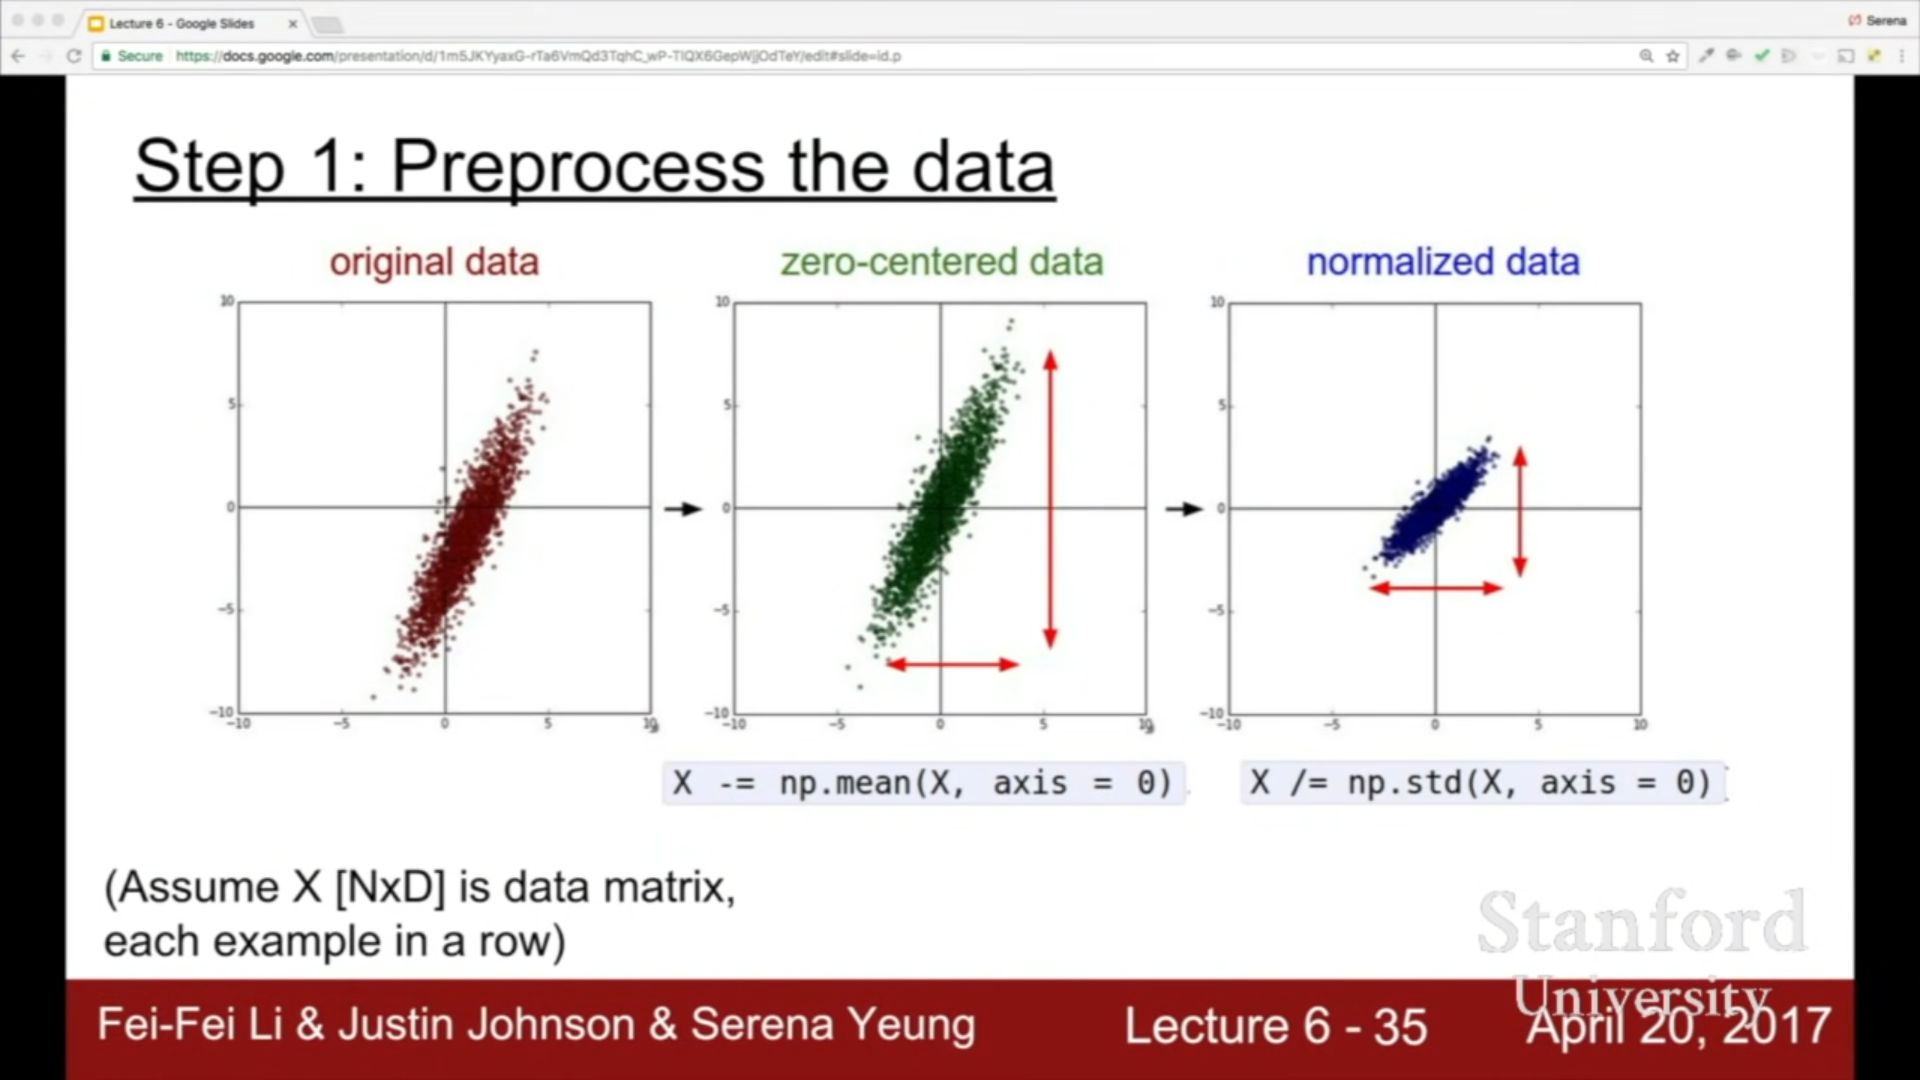


1. **Data Normalization/Scaling**  
   **Purpose**: Normalize or scale the pixel values to a standard range (usually 0 to 1 or -1 to 1) to help the model converge faster during training.  
   **Common Techniques**:  
   - **Min-Max Scaling**:  
     Scale the pixel values to the range [0, 1].  
     Formula:
     ```python
     X_scaled = (X - X.min()) / (X.max() - X.min())
     ```
   - **Z-Score Standardization (Normalization)**:  
     Scale the data to have a mean of 0 and a standard deviation of 1.  
     Formula:
     ```python
     X_normalized = (X - mean) / std
     ```
   **Why**: CNNs usually perform better when the input data is normalized, as it ensures all features contribute equally and avoids bias toward features with larger ranges.

2. **Data Augmentation**  
   **Purpose**: Artificially expand the dataset by applying random transformations to the input images. This helps the model generalize better and avoid overfitting.  
   **Common Techniques**:  
   - **Rotation**: Randomly rotate images within a specified angle range (e.g., -30 to 30 degrees).  
   - **Width/Height Shift**: Randomly shift the image horizontally or vertically.  
   - **Zoom**: Randomly zoom in on the image.  
   - **Flip**: Horizontally flip the image (for tasks like image classification where orientation doesn't matter).  
   - **Color Jittering**: Randomly adjust the brightness, contrast, or saturation.  
   - **Shear**: Apply shear transformations to simulate perspective distortions.  
   **Why**: Data augmentation helps CNNs become more invariant to common transformations, like translations or rotations, and improves generalization.

3. **Image Resizing**  
   **Purpose**: Standardize the input image size so that it fits the CNN input layer.  
   **Common Techniques**:  
   Resize all images to the same dimensions (e.g., 224x224, 256x256, or 512x512).  
   **Why**: CNNs expect inputs of consistent size, so resizing images ensures compatibility with the network architecture. It also helps reduce computational costs when processing images.

4. **Centering/Cropping**  
   **Purpose**: Focus the network on the main object of the image.  
   **Common Techniques**:  
   - **Center Cropping**: Crop the center of the image to focus on the relevant part of the image.  
   - **Random Cropping**: Randomly crop a part of the image (e.g., 224x224 from a 256x256 image) to introduce variability during training.  
   **Why**: Cropping can focus the network on the most important features of the image, which is useful for object detection and classification.

5. **Grayscale Conversion (Optional)**  
   **Purpose**: Convert color images to grayscale if color is not essential for the task.  
   **Why**: For simpler tasks, removing color information can reduce the computational cost and focus on spatial patterns, though it's not typically used in image classification tasks where color is important.

6. **Channel-wise Normalization**  
   **Purpose**: Normalize each color channel separately.  
   **Common Techniques**:  
   For RGB Images: Subtract the mean and divide by the standard deviation for each channel (Red, Green, Blue).  
   Example using mean and standard deviation (for pre-trained models):  
   ```python
   mean = [0.485, 0.456, 0.406]  # Example mean values for ImageNet  
   std = [0.229, 0.224, 0.225]   # Example standard deviation values for ImageNet  
   X_normalized = (X - mean) / std
   ```
   **Why**: Channel-wise normalization helps maintain consistency across color channels and provides a better input for pre-trained networks, which expect inputs to be normalized in a particular way.

7. **Data Shuffling**
   **Purpose**: Shuffle the dataset before training to ensure that the model doesn’t learn based on the order of the data.
   **Why**: Shuffling helps ensure that the model generalizes well by preventing the network from memorizing patterns based on the data order.

8. **Handling Missing Data (if applicable)**
   **Purpose**: If images have missing data (e.g., corrupted files or incomplete), handle them appropriately.
   **Common Techniques**:
   - **Remove corrupted images**: Discard images that can't be loaded or processed.
   - **Imputation**: In cases where pixels are missing, consider filling them with the average color or using techniques like inpainting.
   **Why**: Missing data can cause training issues and affect the model’s ability to generalize, so addressing this beforehand is crucial.

9. **Label Encoding (For Multi-Class Classification)**
   **Purpose**: Convert categorical labels to numerical format.
   **Common Techniques**:
   - **One-hot Encoding**: Create a binary vector for each class. For example, for 3 classes, class 1 would be `[1, 0, 0]`, class 2 would be `[0, 1, 0]`, and class 3 would be `[0, 0, 1]`.
   - **Integer Encoding**: Assign a unique integer to each class (e.g., class 1 → 0, class 2 → 1).
   **Why**: CNNs typically work with numerical data, so converting class labels to numeric format is necessary.

10. **Batch Normalization (Optional)**
   **Purpose**: Normalize activations within a batch during training to improve model convergence.
   **Why**: Batch normalization helps to stabilize training by reducing internal covariate shift and improving gradient flow.

11. **Data Splitting**
   **Purpose**: Split data into training, validation, and test sets.
   **Common Techniques**:
   - **80-20 or 70-30 Split**: Use 80% or 70% of the data for training and the remaining 20% or 30% for validation and testing.
   - **Cross-validation**: Use K-fold cross-validation to ensure that the model performs well across multiple subsets of the data.
   **Why**: Proper data splitting ensures that the model is evaluated on unseen data, which helps estimate its real-world performance.
   

```python
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Example: Load and preprocess image
image = cv2.imread('image.jpg')

# Resize image
image_resized = cv2.resize(image, (224, 224))

# Normalize image
image_normalized = image_resized / 255.0

# Data Augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Reshape image for augmentation (adding batch dimension)
image_expanded = np.expand_dims(image_normalized, axis=0)

# Augment and show the image
for augmented_image in datagen.flow(image_expanded, batch_size=1):
    cv2.imshow('Augmented Image', augmented_image[0])
    break


```
> In summary, zero-centering data around the mean can improve neural network training by standardizing inputs, but it affects different activation functions uniquely: 
- **ReLU**: Zero-centered data can lead to inactive "dead" neurons, especially in deep layers. Using **Leaky ReLU** or **PReLU** can mitigate this by allowing small gradients for negative values.
- **Sigmoid**: Centering can push inputs into the sigmoid’s saturation region, causing vanishing gradients and slowing learning. **Tanh** is often a better choice in hidden layers as it's zero-centered and supports smoother gradient flow.
- **Batch Normalization**: Applying batch normalization stabilizes training across layers by dynamically re-centering and scaling activations, reducing issues from poor gradient flow in deep networks.

Ultimately, combining zero-centered data with appropriate activation functions and batch normalization can lead to faster, more stable training in neural networks.



---

## 7.3 Weight Initialization in the Context of CNNs

In Convolutional Neural Networks (CNNs), weight initialization is critical for training stability and performance. CNNs consist of multiple layers, each with filters (kernels) that learn spatial hierarchies of features, from edges in lower layers to more complex patterns in deeper layers. Proper weight initialization in CNNs ensures that each filter learns distinct features and avoids issues like slow convergence or vanishing/exploding gradients.

Due to the depth and structure of CNNs, initialization strategies that take into account the number of connections in each layer, such as Xavier or He initialization, are commonly used. These strategies help maintain gradient flow throughout the network, preventing gradients from diminishing or exploding as they pass through multiple layers. By doing so, they allow each layer to learn unique and meaningful representations, improving the overall model performance.

### Q: What Happens When `W=0` Initialization is Used?

When weights are initialized to zero (`W=0`), each neuron in the network produces identical outputs because all neurons start with the same weights and biases. This leads to a phenomenon known as **symmetry breaking failure**: if all neurons in a layer have the same weights, they compute the same gradients, update in the same direction, and learn identical features. Consequently, the model fails to learn diverse, meaningful patterns, severely limiting the network's capacity.

This effect is particularly problematic in CNNs, where distinct filters in convolutional layers are meant to capture different patterns and features. Without unique initial weights, the network's filters remain identical, significantly reducing the model's effectiveness and expressive power.

#### First Solution: Small Random Numbers

To avoid symmetry breaking failure, weights are often initialized with small random numbers. For example, using a **Gaussian distribution** with a mean of zero and a standard deviation of `1e-2` ensures that weights are close to zero but different for each neuron. This small variation breaks symmetry, allowing each neuron and filter to learn distinct features and improving the diversity of learned patterns in CNNs.

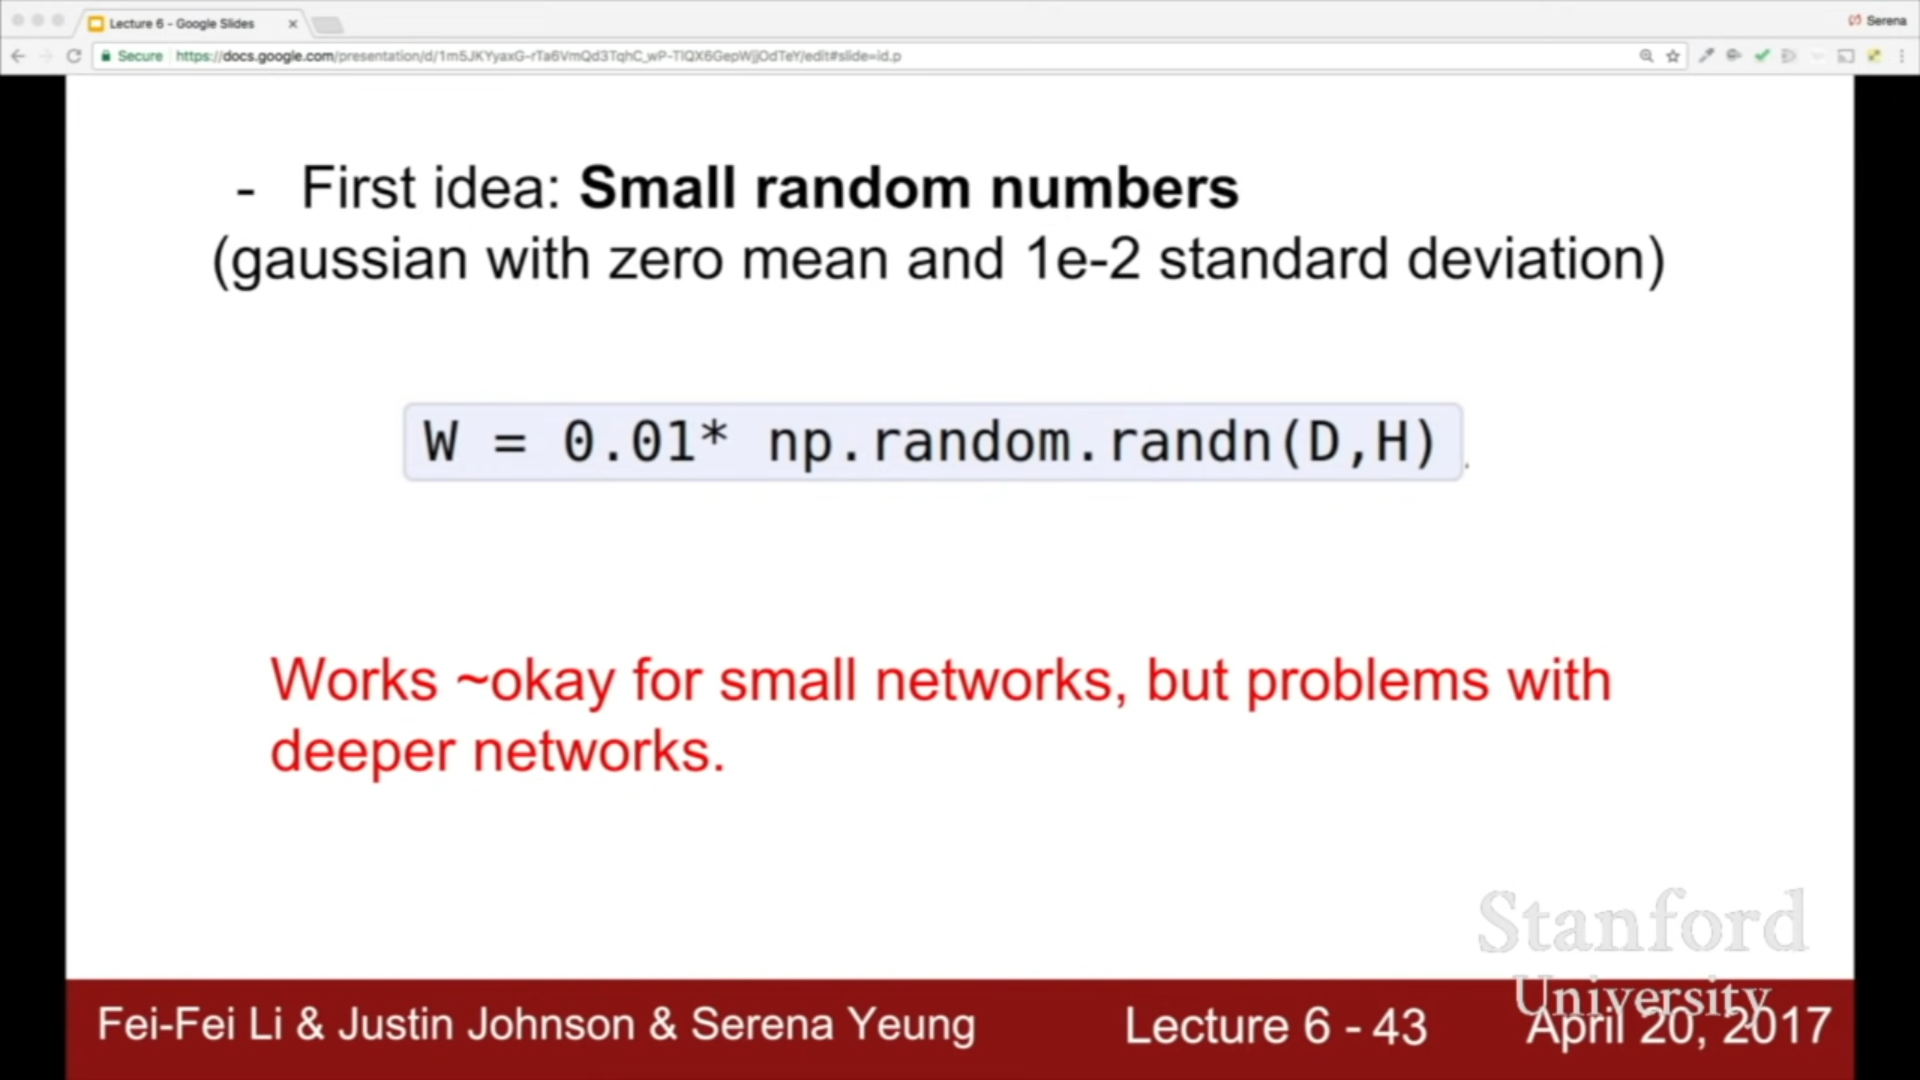

#### Practical Solutions:
In practice, more advanced initializations like **Xavier initialization** (for tanh activation functions) or **He initialization** (for ReLU-based networks) are preferred in deep CNNs. These methods take the size of the layer into account, leading to faster convergence and improved stability, especially in deeper networks.


### Q: What Happens When `W=very large` Initialization is Used?

When weights are initialized with very large values, several issues can arise in training a Convolutional Neural Network (CNN), leading to poor performance and training instability.

1. **Exploding Activations**:
   With large weights, the activations at each layer can become excessively large as they propagate through the network. This is especially problematic in deep networks, where the large activations can grow exponentially with each layer. Consequently, the outputs at the deeper layers can reach extremely high values, causing instability.

2. **Exploding Gradients**:
   During backpropagation, the gradients calculated at each layer are proportional to the activation values. Large activations lead to large gradients, and when backpropagated through the network, these gradients can further increase in magnitude, resulting in **exploding gradients**. This can cause the network weights to change dramatically with each training iteration, making learning unstable and potentially causing the network to diverge (i.e., fail to converge).

3. **Activation Saturation**:
   Large weights often push the neuron activations into the **saturated regions** of activation functions. For example:
   - In a sigmoid activation function, large positive inputs result in values near 1, while large negative inputs approach 0. In these regions, the derivative of the sigmoid function is close to zero, leading to **vanishing gradients**.
   - In the case of the ReLU function, very large weights can cause activations to consistently fall on the positive side, reducing the sparsity typically achieved by ReLU. This may lead to ineffective learning and difficulty generalizing.

4. **Poor Convergence and Overfitting**:
   Large initial weights can cause the model to converge slowly and inefficiently, with large fluctuations in loss. Additionally, the network may be prone to **overfitting** as the initial weight magnitudes may cause the model to memorize training data rather than learning generalized features.

#### Solution: Proper Weight Initialization

To avoid issues related to improper weight initialization, there are several methods to ensure stable training in Convolutional Neural Networks (CNNs). These methods adjust the weight initialization strategy to facilitate better convergence and efficient gradient flow.

##### 1- **Xavier (Glorot) Initialization** : 

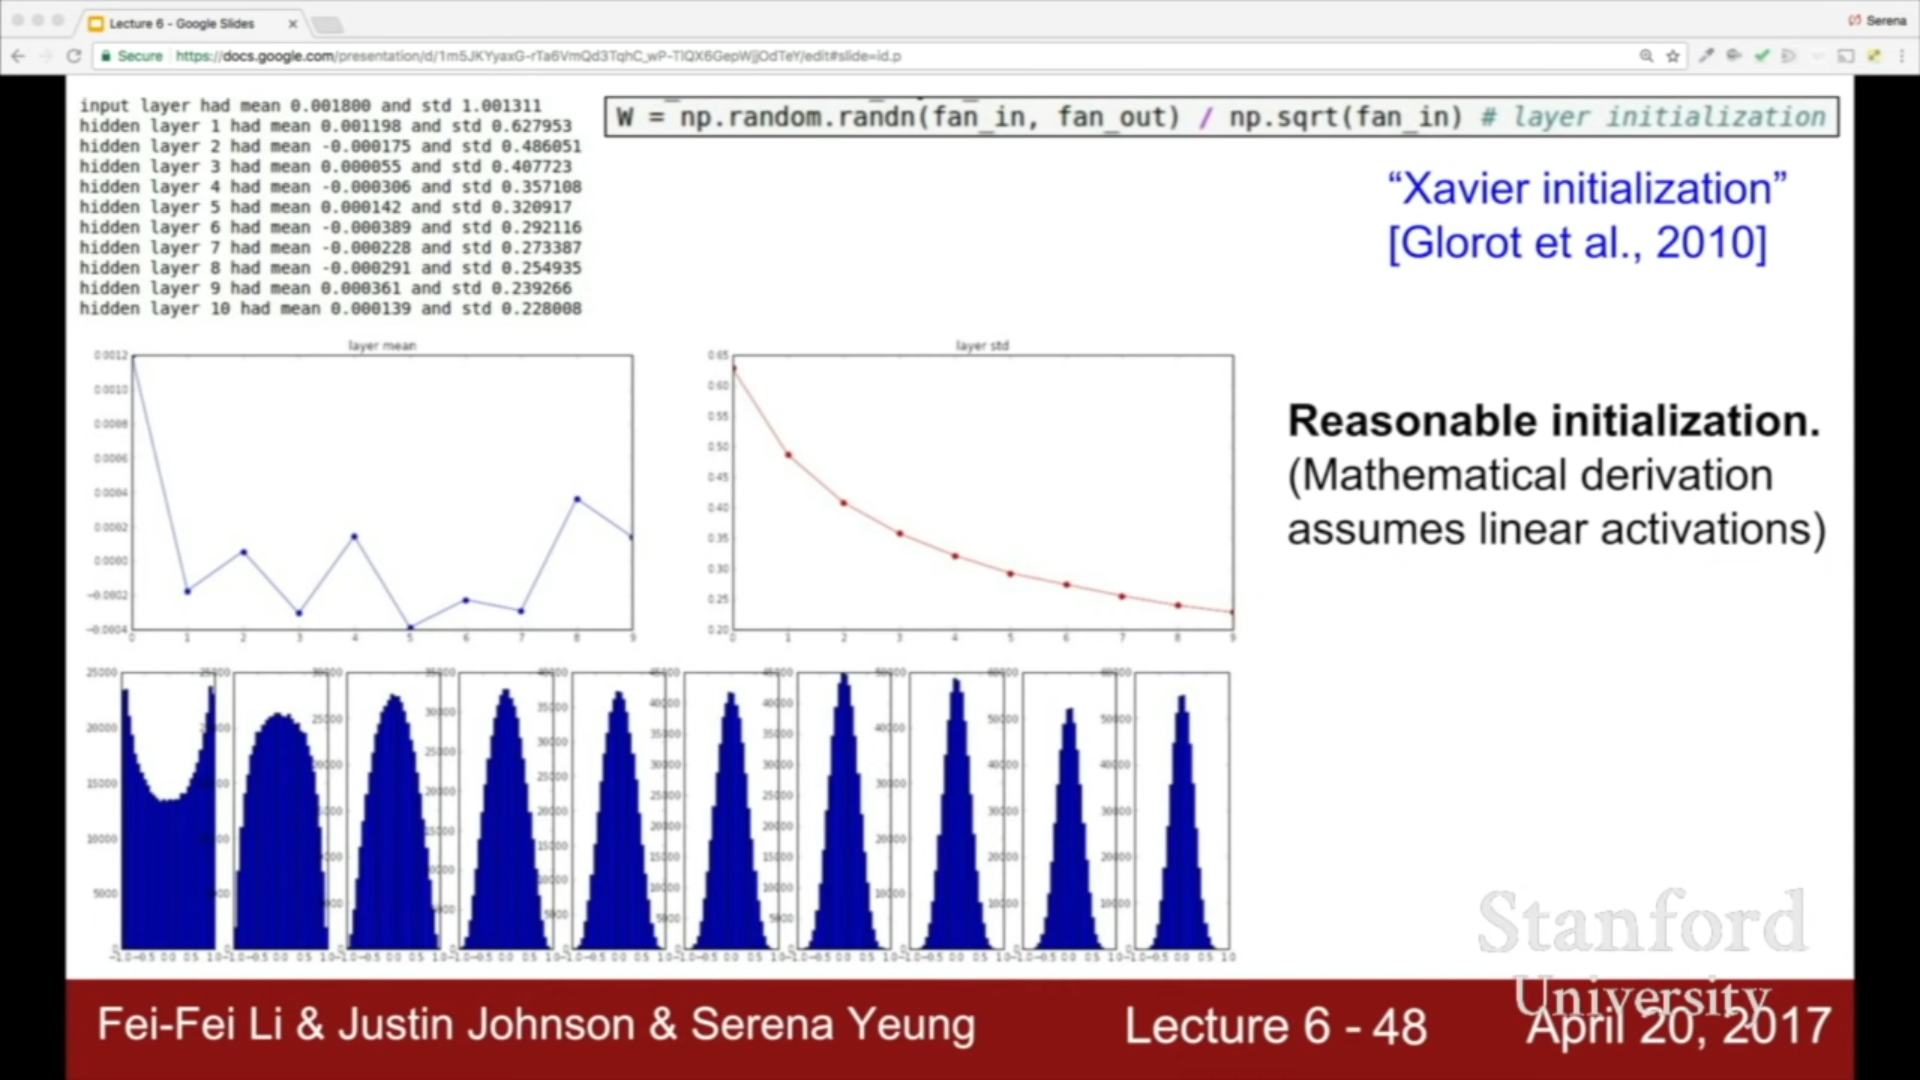

Using Xavier (Glorot) Initialization with ReLU Activations: Challenges and Solution

**Xavier Initialization** was developed for activation functions that produce both positive and negative outputs, like sigmoid and tanh. It scales weights by the inverse square root of the number of neurons, aiming to keep activations stable across layers. However, when used with ReLU activation functions, it may cause some issues:

1. **Positive-Only Output**: ReLU activations are not zero-centered, leading to a shift in mean activation values across layers. This can cause either the signal to shrink or grow as it propagates, making stable training challenging.
  
2. **Dead Neurons**: If the weights are improperly scaled, ReLU activations can result in regions where the neuron outputs zero indefinitely. This leads to "dead neurons," reducing the network's capacity to learn.

>  Solution: He Initialization for ReLU

##### 2- **He Initialization** :

**He Initialization** (or Kaiming Initialization) was specifically designed for ReLU and its variants. It scales weights by the square root of \( \frac{2}{n} \) (where \( n \) is the number of input units in a layer). This ensures:

- **Stable gradients and activations** across layers.
- **Reduced risk of dead neurons** by keeping activations in an effective range.
- **Faster and more efficient convergence**, making it ideal for ReLU-based networks.

These weight initialization methods help ensure activations remain within a manageable range and gradients flow efficiently, which prevents issues like exploding or vanishing gradients.

### Conclusion

Choosing the appropriate weight initialization method is crucial for stable and effective training in CNNs. While Xavier Initialization is suitable for activation functions like sigmoid and tanh, He Initialization is preferred when using ReLU, as it addresses the specific challenges posed by ReLU activations.

---

## 7.4 Batch Normalization

Batch Normalization (BatchNorm) is a technique designed to improve the training of deep neural networks by addressing issues such as internal covariate shift and allowing the network to converge more quickly. It is particularly useful in networks that are deep and have many layers, where the distribution of activations can shift as the network parameters are updated during training.

### Purpose and Mechanism

BatchNorm works by normalizing the activations of each layer so that they have a stable distribution with a mean of zero and a variance of one, known as a **unit Gaussian**. The key steps involved are:

1. **Compute the Empirical Mean and Variance**: For a given batch of activations, compute the mean and variance of each dimension independently. This helps to adjust for internal covariate shift — the phenomenon where the distribution of inputs to a given layer changes during training as the parameters of the previous layers change.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*H9z4giCmcQbZIBjdcNPkrQ.png)


2. **Normalize**: The activations for each dimension are then scaled and shifted based on the computed mean and variance, effectively ensuring that the activations are centered around zero and have unit variance (a unit Gaussian).

   > **“You want unit Gaussian activations? Just make them so.”**  
   — Ioffe and Szegedy, 2015

### Typical Placement

Batch Normalization is typically inserted:
- **After Fully Connected or Convolutional layers**.
- **Before the nonlinearity (activation function)**, such as ReLU or Sigmoid.

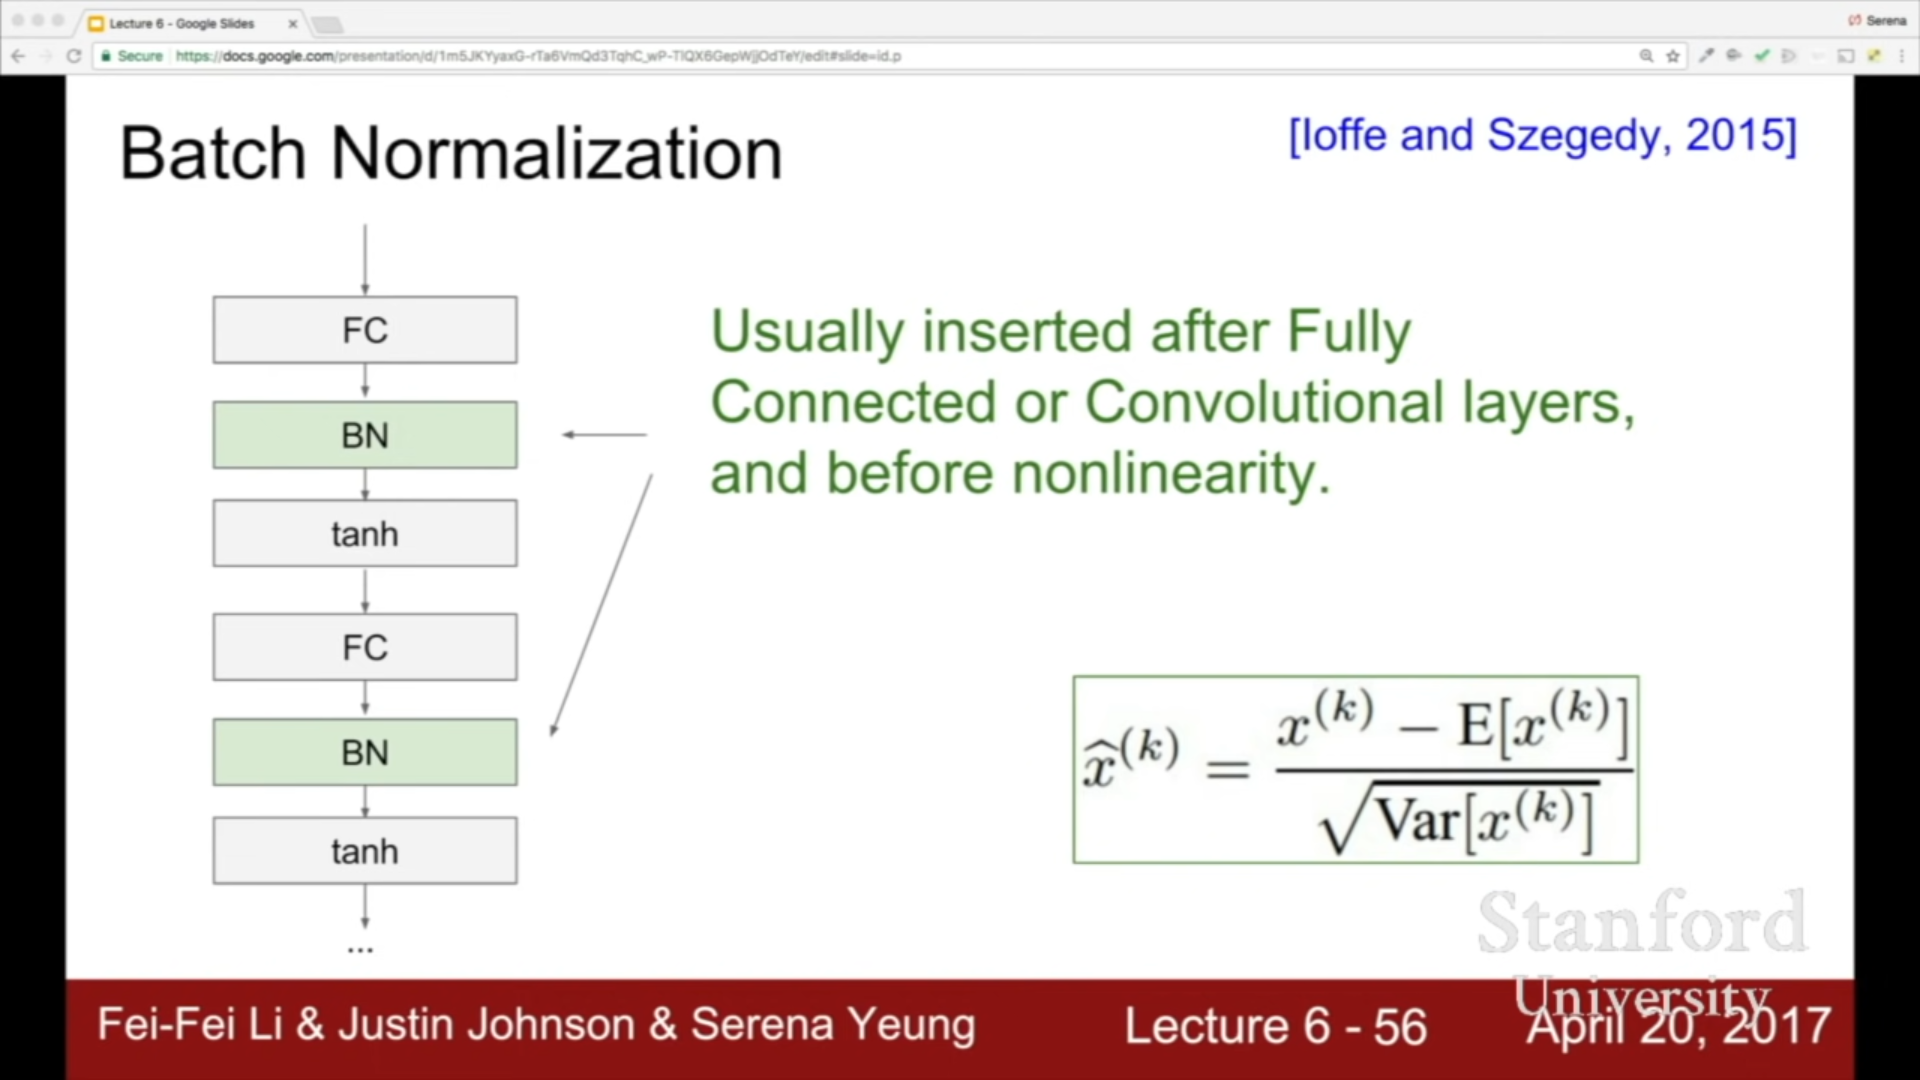

This placement ensures that the activations are normalized before they undergo any nonlinear transformations, which can help to prevent the network from becoming stuck in areas of the activation function where gradients are either too small or too large.

### Considerations for Tanh Activation

One question that arises with BatchNorm is whether we necessarily want a unit Gaussian input for every activation function. For example, for **tanh** activations, the input range is important because the tanh function squashes inputs into a [-1, 1] range. A unit Gaussian with a mean of 0 and variance of 1 could produce inputs that are outside of this range, leading to saturation and a loss of gradient during backpropagation. 

However, the network can learn to adjust and recover the identity mapping if needed, allowing it to bypass the normalization step in specific layers when it is advantageous.

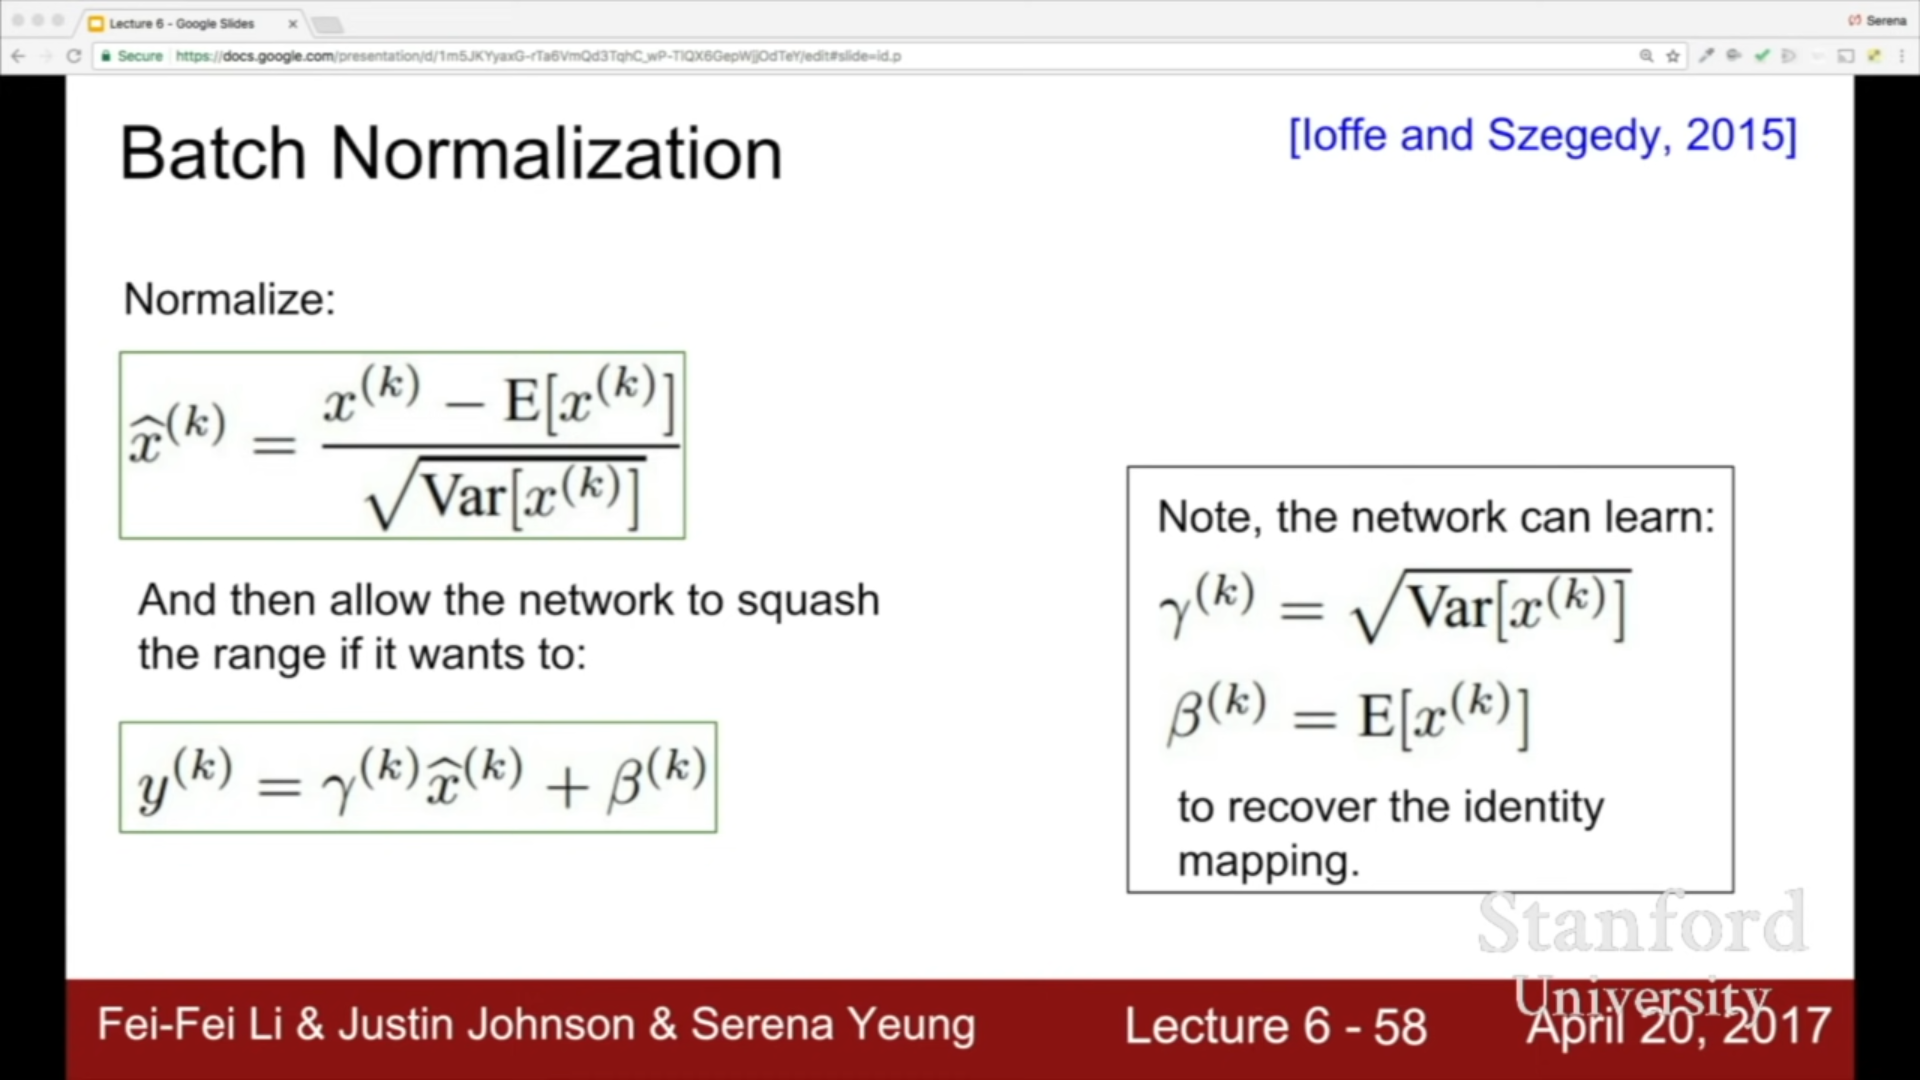

### Benefits of Batch Normalization

Batch Normalization offers several advantages:

1. **Improves Gradient Flow**: By normalizing activations, BatchNorm helps to maintain a more stable distribution of activations throughout the network, making it easier for gradients to propagate back through the layers during training. This leads to more efficient training and faster convergence.

2. **Allows Higher Learning Rates**: Because BatchNorm reduces the risk of gradient explosion or vanishing gradients, higher learning rates can be used during training, leading to faster convergence and more robust training.

3. **Reduces Dependence on Initialization**: BatchNorm reduces the reliance on careful weight initialization. With BatchNorm in place, the network becomes less sensitive to initial weights, which makes the network more robust and easier to train.

4. **Acts as a Regularizer**: Interestingly, BatchNorm has a slight regularizing effect. It can reduce overfitting and, in some cases, might reduce the need for techniques like dropout, though this is not its primary purpose.

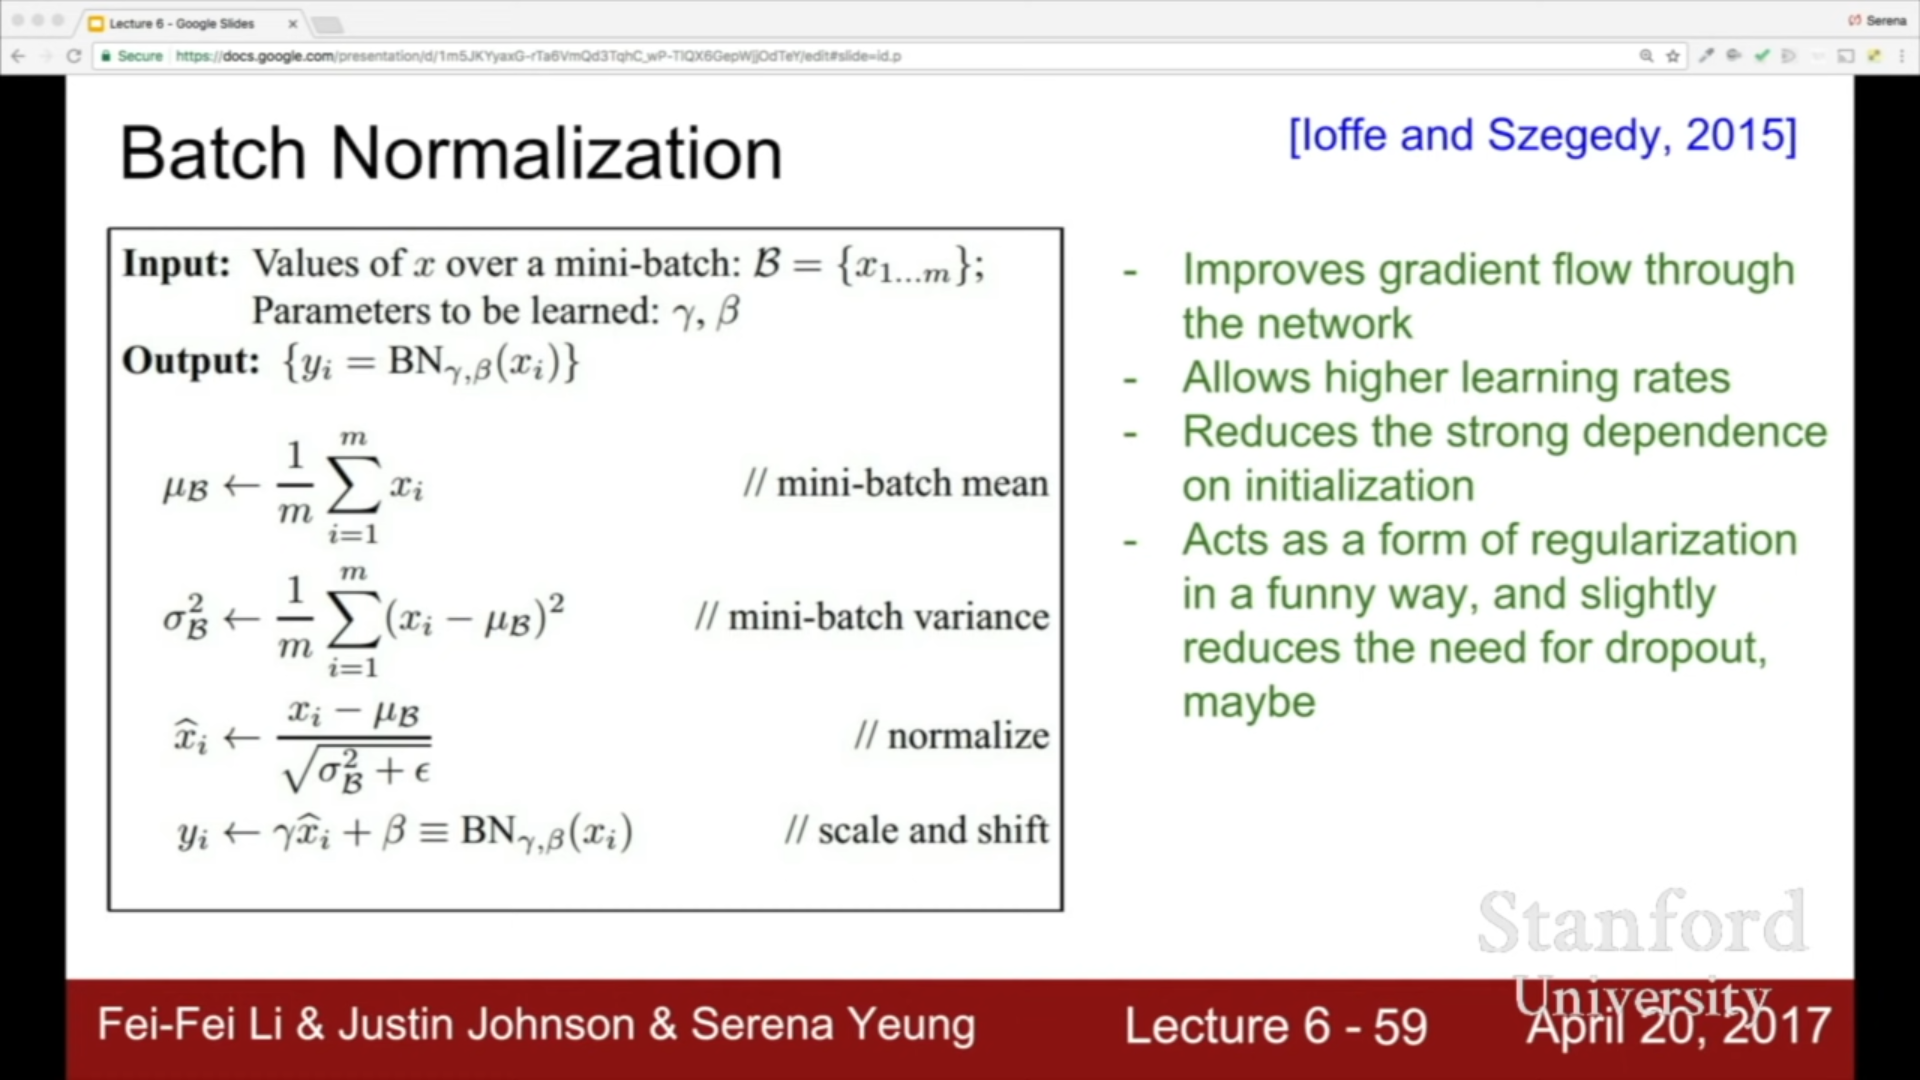


| **Aspect**                    | **Gamma and Beta in Batch Normalization**                                   | **β₁ and β₂ in Adam Optimizer**                                         |
|--------------------------------|----------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Purpose**                    | Scale and shift normalized activations to allow flexibility in learning.  | Control moving averages of gradients and squared gradients for adaptive updates. |
| **Role in Training**           | Learnable parameters updated during backpropagation to adjust activations. | Hyperparameters set before training, not learned during training.      |
| **Context**                    | Part of the network's architecture, affecting activations at each layer.  | Part of the optimization process, influencing weight updates.           |
| **Learning**                   | Updated during training based on loss and activations.                    | Not updated during training; fixed before training begins.             |
| **Function**                    | Normalize activations and reintroduce flexibility via scaling (gamma) and shifting (beta). | Control the decay rates for moving averages of the first and second moments. |
| **Effect on Network**          | Stabilizes training by normalizing activations and enabling better gradient flow. | Helps with adaptive learning rates and improves convergence efficiency.  |


### Batch Normalization at Test Time

At **test time**, BatchNorm operates differently than during training:

- **No Batch Mean/Variance Computation**: During testing, the mean and variance are **not computed** based on the current batch of data. Instead, a fixed set of statistics is used — typically, the **running averages** of the mean and variance computed during training.
  
- **Running Averages**: These running averages are updated during training and are used at test time to ensure the normalization is consistent across training and inference phases.

### Conclusion

Batch Normalization improves the efficiency and stability of deep neural networks by normalizing activations and helping to mitigate issues like internal covariate shift. By allowing for higher learning rates, reducing the need for careful initialization, and acting as a form of regularization, BatchNorm has become a standard technique in many state-of-the-art neural network architectures.


---
